## **Data Mining with Python**
### **Semana 6: Clustering ``Evaluación``**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
from plotnine import *
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set(rc={'figure.figsize':(5.27,5.27)})

In [2]:
iris = datasets.load_iris() 
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data)

### **Hopkins Statistics**

La función **`hopkins`** del paquete **`pyclustertend`** permite calcular la tendencia de **`hopkins`** en forma rápida. Sin embargo, tiene problemas con largos set de datos. La función recibe solo dos parámetros, los datos y el número de puntos aleatorios a generar.
```python
hopkins(dataset,numSample)
```

Recuerde que este estadistico se calcula 1 menos el valor del test. Por otro lado, para instalar el modulo `pyclustertend` se puede hacer mediante `pip install pyclustertend`.

In [4]:
from pyclustertend import hopkins
print("Coeficiente de Hopkins, datos de iris escalados:",1 - hopkins(scaled_features,30))

Coeficiente de Hopkins, datos de iris escalados: 0.8326077077382616


In [5]:
tempData = np.random.uniform(low = 0,high = 1,size = (150,2))
print("Coeficiente de Hopkins, datos aleatorios:",1 - hopkins(tempData,30))

Coeficiente de Hopkins, datos aleatorios: 0.5188699196331886


### **Evaluación matriz de distancia**

Para evaluar la matriz de distancia entre los puntos, utilizaremos las funciones `vat` e `ivat` del paquete `pyclustertend`. Tal como en el caso anterior, se tiene problemas con largos set de datos.

Ambas funciones simplemente reciben un set de datos y despliegan la matriz de distancia. La principal diferencia entre ellas es que `ivat` deja en blanco las distancia que considera irrelevantes.

**`VAT`** (evaluación visual de tendencia) es un algoritmo que crea una visualización de un conjunto de datos específico. Esta visualización puede 
ser útil para obtener una idea del número de clústeres y la jerarquía de clústeres. El algoritmo crea un árbol de expansión mínimo de observaciones. Se muestra la distancia por pares entre esas observaciones. Cuanto más negro es el color, más pequeña es la distancia entre dos observaciones. Una forma de interpretar la imagen es contar el número de cuadrados negros en la diagonal que debería representar el número de grupos.

El algoritmo **`IVAT`** es una versión mejorada del algoritmo **`VAT`** que produce imágenes más precisas a costa de un mayor costo informático.

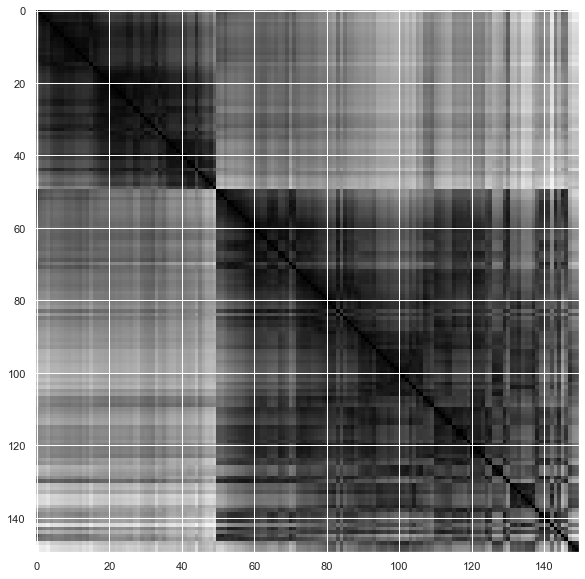

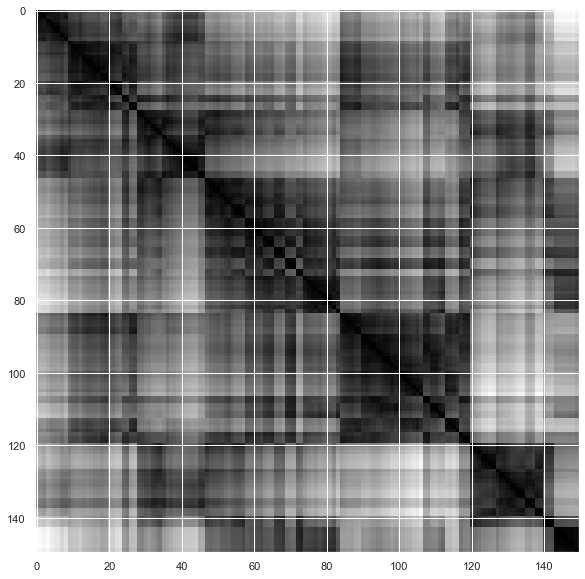

In [6]:
from pyclustertend import vat,ivat
vat(scaled_features)
vat(tempData)

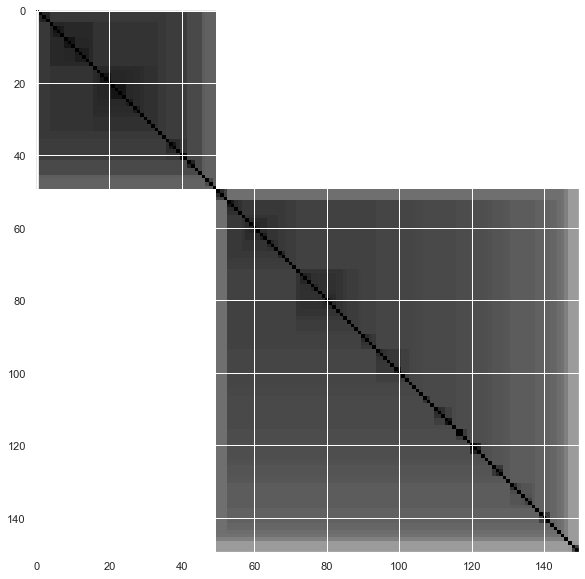

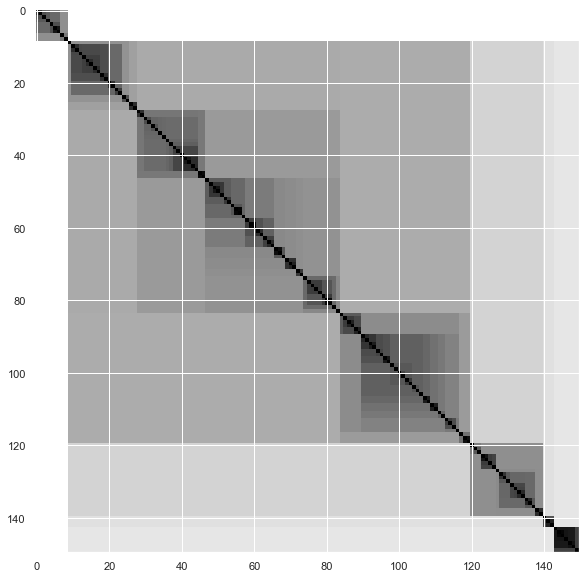

In [7]:
ivat(scaled_features)
ivat(tempData)

### **Cohesión y separación**

Los coeficientes de cohesión y separación deben ser calculados por nosotros mismos. Por lo cual, usando el código de abajo podemos calcularlos en forma rápida.

In [9]:
km = KMeans(n_clusters=2)
km = km.fit(scaled_features)

In [10]:
tempCohesion=0
for j in range(km.n_clusters):
    # Calculando el centro del clusters
    centroCluster = np.mean(scaled_features[km.labels_==j,:],axis=0)
    # Calculando la cohesion para ese cluster
    tempCohesion += np.square(scaled_features[km.labels_==j,:]-centroCluster).sum()
print("Cohesión: ",tempCohesion)

Cohesión:  222.36170496502305


In [11]:
tempSeparacion=0
# Calculando el centro de los datos
centroData=np.mean(scaled_features,axis=0)
for j in range(km.n_clusters):
    # Calculando el centro del clusters
    centroCluster=np.mean(scaled_features[km.labels_==j,:],axis=0)
    # Calculando la separación para ese cluster
    tempSeparacion+=(km.labels_==j).sum()*np.square(centroCluster-centroData).sum()
print("Separación: ",tempSeparacion)
print("Separación + cohesión: ",tempSeparacion+tempCohesion)

Separación:  377.6382950349771
Separación + cohesión:  600.0000000000001


### **Coeficiente de silhouette**

El coeficiente de silhouette promedio se calcula con la función `silhouette_score` del submodulo `sklearn.metrics`.

`silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)`

Parámetros:

* `X`: set de datos o matriz de distancia..
* `labels`: etiquetas de los clusters.
* `metric`: métrica de distancia a utilizar, si `X` es una matriz de distancia se utiliza "precomputed"..
* `sample_size`: número de puntos (para grandes bases de datos).
* `random_state`: inicialización del número aleatorio para el sampleo.

De igual manera, la función `silhouette_samples` calcula el coeficiente de Silhouette para cada punto por separado.

`silhouette_samples(X, labels, metric='euclidean')`

Parámetros:

* `X`: set de datos o matriz de distancia..
* `labels`: etiquetas de los clusters.
* `metric`: métrica de distancia a utilizar, si `X` es una matriz de distancia se utiliza "precomputed"..

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
numClusters = 3
km = KMeans(n_clusters=numClusters)
km = km.fit(scaled_features)

# Calculando el coeficiente de silhouette promedio
silhouette_avg = silhouette_score(scaled_features, km.labels_)
print("Para n_clusters =", numClusters,"el coeficiente promedio de silhouette_score es:", silhouette_avg)

# Calculando el coeficiente dfe Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(scaled_features, km.labels_)
sample_silhouette_values

Para n_clusters = 3 el coeficiente promedio de silhouette_score es: 0.45994823920518635


array([ 0.73419485,  0.56827391,  0.67754724,  0.62050159,  0.72847412,
        0.60988485,  0.69838355,  0.73081691,  0.48821004,  0.63154089,
        0.67418286,  0.72179392,  0.57847213,  0.54944562,  0.55294537,
        0.45806886,  0.62112236,  0.72875221,  0.58590385,  0.67746392,
        0.66042913,  0.69021224,  0.69653476,  0.63737612,  0.70132024,
        0.54494792,  0.70471457,  0.72151031,  0.71451919,  0.66776336,
        0.62562482,  0.64783099,  0.58967022,  0.54088124,  0.62843507,
        0.67614681,  0.66543365,  0.72441906,  0.5526219 ,  0.72470474,
        0.73333453,  0.07766666,  0.63725809,  0.66371521,  0.64863547,
        0.5593465 ,  0.67881722,  0.66606206,  0.68912398,  0.71077363,
        0.34169992,  0.16627565,  0.35854546,  0.54373992,  0.1327061 ,
        0.53878741,  0.23206569,  0.40978046,  0.03768897,  0.54390267,
        0.42467141,  0.34088756,  0.4694655 ,  0.33187646,  0.4951792 ,
        0.18906699,  0.39249659,  0.54918014,  0.40350566,  0.58

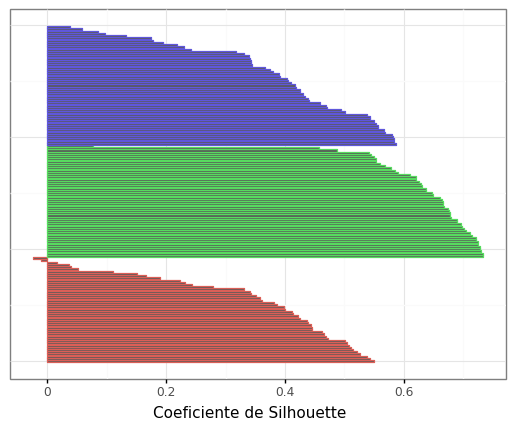

<ggplot: (8758243082039)>

In [16]:
# Visualizando los coeficientes de Silhouette
tempDF = pd.DataFrame(columns=['SC','labels'])
for i in range(km.n_clusters):
    # Ordenando los valores de cada cluster
    tempData=np.sort(sample_silhouette_values[km.labels_==i])[::-1]
    tempDF2=pd.DataFrame(tempData,columns=["SC"])
    tempDF2["labels"]=i
    # Agregandolo a un nuevo data frame
    tempDF=tempDF.append(tempDF2)
tempDF.reset_index()
(ggplot(tempDF)+aes(y="SC",x=range(150),color="factor(labels)")
 +geom_col(show_legend=False)+coord_flip()+theme_bw()
 +labs(y="Coeficiente de Silhouette")+theme(axis_text_y=element_blank(),axis_ticks_major_y=element_blank())
)

### **Buscando el mejor número de clusters**

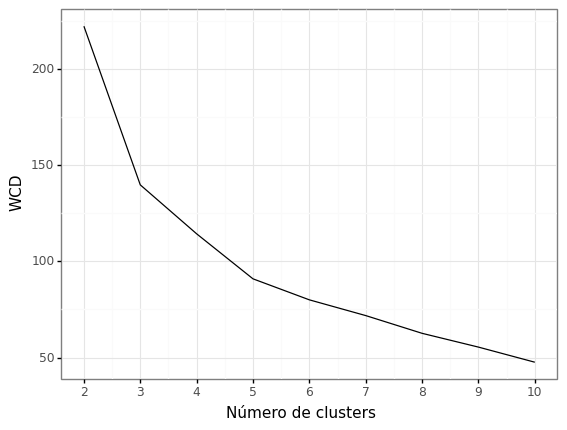

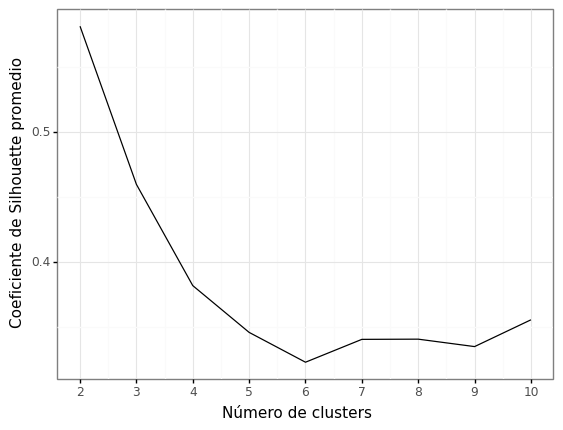

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
sse = []
CS = []
maxK=11
for k in range(2, maxK):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    CS.append(silhouette_avg)
print(ggplot()+aes(x=range(2, maxK),y=sse)+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
 +scale_x_continuous(breaks=range(1,maxK)))
print(ggplot()+aes(x=range(2, maxK),y=CS)+theme_bw()+geom_line()+labs(x="Número de clusters",y="Coeficiente de Silhouette promedio")
  +scale_x_continuous(breaks=range(1,maxK)))